# Gradient Descent and Optimization

The gradient descent is great for finding any changes in sign of derivatives within in interval. One of several ways to see if the derivative of a function changes from positive to negative is to first plot the given function and then look to see where a local minimum is a located, and then randomly pick any number to the right of the supposed local minimum, which we will call $ x_0 $. Obviously, at $ x_0 $, $ f'(x_0) $ is currently positive. We have to keep moving to the left, by decreasing $ x_0 $ by a certain amount, which we will call $ step $, until the derivative changes from positive to negative. The change in slope from positive to negative means that at some point right before a loop terminated, $ x_0 $ must have passed a value for which the function $ f(x) $ had a derivative very close to zero - a point for which the function is said to have a local minimum. While this is simple, there are many things we have to keep in mind so that the gradient descent can work to give us accurate results. Let's take a look at a very basic function $$ f(x) = x^2 $$

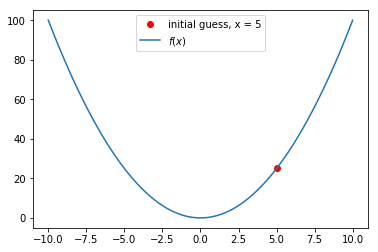

In [3]:
x = np.linspace(-10, 10, 10000)
f = lambda x: x**2
y = f(x)

x0 = 5
plt.plot(x0, f(x0), 'ro', label = 'initial guess, x = 5')
plt.plot(x, y, label = '$ f(x) $')
plt.legend()
plt.show()

So, as we can see from the graph, obviously, the function $ f(x) $ has a local minimum somewhere around $ x = 0 $. We initialized the $ x $ at $ 5 $. From $ x_0 = 5 $, the derivative of the function is obviously positive. We want to create a while loop and terminate it as soon as we detect that the derivative becomes less than or equal to zero as we decrement $ x $ by some step size. At the initial $ x $ value of $ 5 $, the gradient descent may work just fine. I can probably use a step size of like $ 0.00001 $ and have the program keep checking if the next function value at $ x $, $ f(x_{next}) $, is greater than the current function value at $ x $, $ f(x_{now}) $, and if it is, then the current $ x $, which we can call $ x_{now} $, will be what we desire. 

As mentioned previously in the introduction, there are things we should keep in mind in order for the gradient descent method to be effective. Obviously, a very small step size $ step $, such as $ 0.01 $ will give better result than $ step = 1 $. An even smaller step size such as $ step = 0.001 $ will give even more accurate result than a step size of $ step = 0.01 $. So this means that the smaller the step size to the left, the better. Great. then why not just decrease $ x_0 $ by a really small number right from the start, like $ 0.0001 $?

Look back at the graph. We know that the local minimum is at $ x = 0 $. What would happen if I make an initial assumption of $ x_0 = 1,000,000 $? Think about it? We are starting at $ x_0 = 1,000,000 $, we are using the gradient descent and we are using a step size, decrease of $ 0.00001 $. This means that for each unit of $ 1 $, we are decreasing the value of $ x $ by $ 0.00001 $, ten thousand times for each unit of $ 1 $, multiplied by a million. A nifty frame of reference would be to take into consideration another programming language that is faster than Python. We all know, that C++ one of the top three fastest languages out there when it comes to raw performance. From my experience, C++ has been able to do basically everything that I throw at it. However, with this kind of particular problem we are discussing, I honestly believe that even the mighty C++ may not be able to do this. We can do the other way and take a step size of a negative integer, say $ 1 $, and this will get us faster to $ x = 0 $, but then the answer we will get will not be a very accurate one. 

So, how do we deal with such problems? The solution is to do both!!! That is, first, we need to decrease the $ x $ by an integer number, say $ x_{next} = 1 $, just to detect where the derivative becomes negative and terminate the loop as soon as that change in derivative has been detected, and then go back by exactly the same step, $ 1 $, to the position just before a negative derivative was detected. From that point, we can finally use a step size of $ 0.00001 $ to get a very accurate value of $ x $ for which we have a local minimum. All these are implemented in the $ minimize $ function later.

Let us look at a different function $$ f(x) = x^2 - 3.6x + 6.24 $$

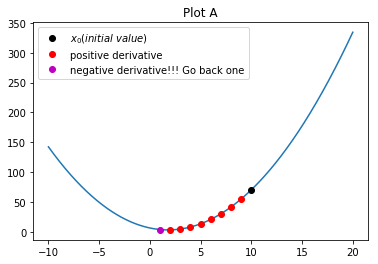

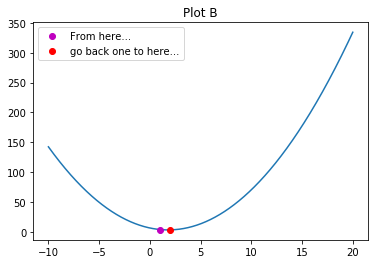

In [3]:
f = lambda x: x**2 - 3.6*x + 6.24
x = np.linspace(-10, 20, 10000)
x0 = 10
x_next = x0 - 1
x_pos = []
while derivative(f, x_next) > 0:
    x_pos.append(x_next)
    x_next = x_next - 1
x_neg = x_next
x_pos = np.asarray(x_pos)
plt.plot(x, f(x))
plt.plot(x0, f(x0), 'ko', label = '$ x_0(initial\ value) $')
plt.plot(x_pos, f(x_pos), 'ro', label = 'positive derivative')
plt.plot(x_neg, f(x_neg), 'mo', label = 'negative derivative!!! Go back one')
plt.legend()
plt.title('Plot A')
plt.show()
plt.plot(x, f(x))
plt.plot(x_neg, f(x_neg), 'mo', label = 'From here...')
plt.plot(x_neg + 1, f(x_neg + 1), 'ro', label = 'go back one to here...')
plt.legend()
plt.title('Plot B')
plt.show()

In Plot A above, we can anticipate that the local minimum is located between $ x = 0 $ and $ x = 5 $. What would we do next? Well, we can just pick any number to the right of that local minimum and initialize $ x $ to that, then work our way to the left until the derivative changes from positive to negative. The purple dot on the curve indicates that the derivative there is negative. In Plot B, we were asked to go back by exactly a unit equal to the magnitude of our decrement step, which in our case is $ 1 $. Once we are back at the specified point(red dot), we can finally do the same exact thing, except we can now use a very small step size. Remember, the smaller the step size, the better the approximation will be. The best step size that I have found is $ 0.00001 $. This is the best step size that will yield very accurate local minimum, or maximum(as we will see later), without Python throttling on us. If we increase the number of zeros by one or more, $ 0.000001 $, the calculation becomes very slow, and may take at least 3 seconds to complete, which we want to avoid at all times because it's annoying. Finally, the answer we get is a very reliable and accurate one. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def derivative(f, x):
    h = 0.000001
    numerator = f(x + h) - f(x)
    return numerator/h

def minimize(f, x0, step):
    x_now = x0
    x_next = x_now - step
    while derivative(f, x_next) > 0:
        x_now = x_next
        x_next = x_now - step
        if derivative(f, x_next) < 0:
            x_now = x_next + step
            x_next = x_now - 0.00001
            while f(x_next) < f(x_now):
                x_now = x_next
                x_next = x_now - 0.00001
    return x_now

def maximize(f, x0, step):
    x_now = x0
    x_next = x_now - step
    while derivative(f, x_next) < 0:
        x_now = x_next
        x_next = x_now -step
        if derivative(f, x_next) > 0:
            x_now = x_next + step
            x_next = x_now - 0.00001
            while f(x_next) > f(x_now):
                x_now = x_next
                x_next = x_now - 0.00001
    return x_now

minimize = np.vectorize(minimize)
maximize = np.vectorize(maximize)
derivative = np.vectorize(derivative)

def optimize(f, a, b, x0s, initial_decrease, n = 10000):
    init_min = []
    init_max = []
    x_total = []
    local_min = []
    local_max = []
    x = np.linspace(a, b, n)
    y = f(x)
    for i in x0s:
        if f(i - 0.001) < f(i):
            init_min.append(i)
        elif f(i - 0.001) > f(i):
            init_max.append(i)
    x_min = minimize(f, init_min, initial_decrease)
    x_max = maximize(f, init_max, initial_decrease)
    for i in x_min:
        x_total.append(i)
    for j in x_max:
        x_total.append(j)
    x_total.append(a)
    x_total.append(b)
    x_total = np.asarray(x_total)
    y_total = f(x_total)
    x_maximum = x_total[f(x_total) == max(f(x_total))]
    x_minimum = x_total[f(x_total) == min(f(x_total))]
    x_maximum = x_maximum.tolist()
    x_minimum = x_minimum.tolist()
    relative_max = (x_maximum, max(y_total))
    relative_min = (x_minimum, min(y_total))
    for i in x_min:
        local_min.append((i, f(i)))
    for j in x_max:
        local_max.append((j, f(j)))
    plt.plot(x, f(x))
    plt.plot(x_min, f(x_min), 'ro', label = 'Local Minima')
    plt.plot(x_max, f(x_max), 'mo', label = 'Local Maxima')
    plt.legend()
    plt.show()
    print('Local Minima:', local_min)
    print('Local Maxima:', local_max)
    print('Relative Minimum:', relative_min)
    print('Relative Maximum:', relative_max)
    return

# The "minimize" function

The $ minimize $ function(defined above), implements everything I described previously. It takes a function $ f $ as one of the parameters, which is the function to be minimized. The second parameter, $ x_0 $, is the initial value, which is any number to the right of the local minimum but not past another extrema. Note, that the $ minimize $ function will only execute if there exists a local minimum to the left of $ x = x_0 $. Otherwise, we will get an error. Finally, the last parameter, $ step $, is the initial value of decrease to $ x_0 $ in order for us to detect a change in derivative early. In most cases, as long as minimas are not apart by numbers smaller than $ 1 $, such as $ step = 0.9, 0.5, 0.2, $etc, the most convenient initial step size would be $ step = 1 $. Once the derivative changes from positive to negative, $ x_0 $ will step back to the right by exactly $ step $ unit, and then keep decreasing from that spot by $ 0.00001 $, and $ f(x_{now}) $ and $ f(x_{next}) $ are constantly going to get compared. As long as $ f(x_{next}) < f(x_{now}) $, $ x_{next} $ will keep getting updated. The moment the reverse becomes true, the loop stops, and then $ x_{now} $ gets returned. 

To reiterate things, the minimize function is a two-step process, or passes. The first pass is only concerned with finding the spot where the derivative changes from positive to negative. The moment the slope changes from positive to negative, $ x_0 $ moves back to the right by $ step $ amount, where $ step $ is the initial step size which is recommended to be an integer, preferrably $ 1 $, depending on how far the initial $ x_0 $ is to the right of the supposed local minimum. Then, the second pass begins. When $ x_0 $ takes a step back to the last spot where it was seen to be positive, from that spot, $ x_0 $ decreases by $ 0.00001 $. $ f(x_0) $ and $ f(x_0 - 0.00001) $ will be compared continously, where $ x_{next} = x_0 - 0.00001 $ and $ x_{now} = x_0 $: as long as $ f(x_{now}) > f(x_{next}) $, $ x_{now} $ will keep decreasing by $ 0.00001 $. The moment this expression becomes false, the program terminates. $ x_{next} $ will be rejected and $ x_{now} $ is returned as the local minimum $ x $ value.



Let us put the minimize function to the test by using it on the function $$ f(x) = 3x^5 - 20x^3 $$

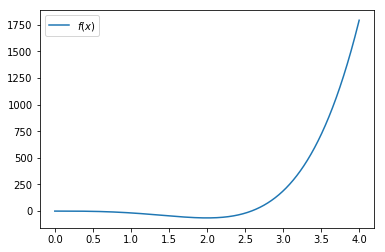

In [2]:
f = lambda x: 3*x**5 - 20*x**3
x = np.linspace(0, 4, 10000)
plt.plot(x, f(x), label = '$ f(x) $')
plt.legend()
plt.show()

Looking at the graph, it appears that there is a local minimum between $ x = 1.5 $ and $ x = 4 $. We can apply the minimize function by picking $ x_0 $ to be any number to the right of the local minimum. $ x_0 = 4 $ would be a great initial value. Also, $ step = 1 $ would also be great in this case. Let us execute the minimize function

In [7]:
x0 = 4
step = 1
local_minimum_at = minimize(f, x0, step)
print(local_minimum_at)

2


$ x = 2 $, is indeed the correct value of $ x $ for which $ f $ has a local minimum. 

# Summary of the "minimize" function

The purpose of the $ minimize $ function is to make it easier for us pick the initial $ x $, $ x_0 $, without having to stare at the plot for too long trying to decide which is the closest $ x $ to the local minimum so that Python can quickly find the local minimum. The minimize function allows us to just pick any integer to the right of the local minimum as our $ x_0 $ and the function will take care of everything else from there.

# The "maximize" function

The $ maximize $ function works exactly the same as the $ minimize $ function because I programmed it in the same exact way, with the only difference being that I reversed everything that I did when I programmed the "minimize" function. I simply reversed the inequalities of the $ minimize $ function to obtain the $ maximize $ function. Let us test the "maximize" function on the same function above, $$ f(x) = 3x^5 - 20x^3 $$ 

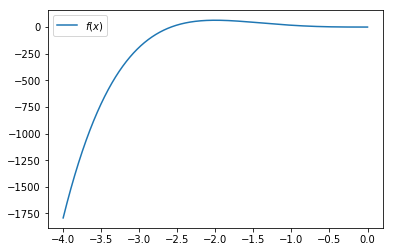

In [8]:
x = np.linspace(-4, 0, 10000)
plt.plot(x, f(x), label = '$ f(x) $')
plt.legend()
plt.show()

Looking at the graph, it appears that there is a local maximum $ x_{max} $ in the interval $ -4 \leq x_{max} \leq -1 $. $ x_0 = -1 $ would be a good initial value because it is on the right of the local maximum that we are trying to find, and as before, $ step = 1 $ would be a good first initial step size.

In [9]:
x0 = -1
step = 1
local_maximum_at = maximize(f, x0, step)
print(local_maximum_at)

-2


$ x = -2 $, is indeed a value of $ x $ for which $ f $ has a local maximum.

# The "optimize" function

The $ optimize $ function puts together the $ minimize $ and $ maximize $ function and utilizes them to find all the local minima and maxima within the close interval $ [a, b] $; we have to still manually pick the $ x_0s$(list or array) to the right of the minima and maxima and pass them to the $ optimize $ function as a list or an array. The "initial_decrease" parameter is analogous the $ step $ of the $ minimize $ of $ maximize $ function. $ n $ is the number of points within the interval $ [a, b] $, and has a default value of $ 10,000 $. The $ optimize $ function returns all the local minima and maxima within the interval $ [a, b] $, and identifies the relative minimum and relative maximum within that interval. Let us test the $ optimize $ function on the function $$ f(x) = cos(x) $$

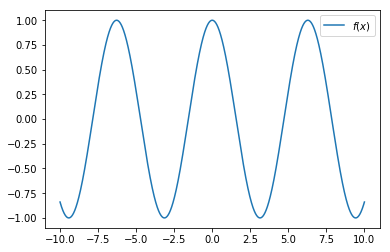

In [10]:
a, b = -10, 10
x = np.linspace(a, b, 10000)
f = lambda x: np.cos(x)
plt.plot(x, f(x), label = '$ f(x) $')
plt.legend()
plt.show()

From the graph, there appears to be a minimum in the interval $ -10 \leq x \leq -7.5 $, a maximum in $ -7.5 \leq x \leq -5 $, a minimum in $ -5 \leq x \leq -1 $, and so on. We can pick the right endpoint of each interval and put them in a list and then pass it to the $ optimize $ function.

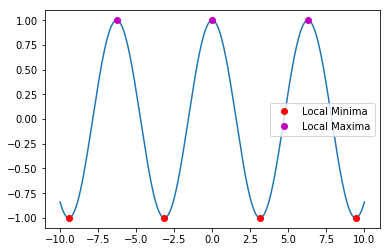

Local Minima: [(-9.42477999996499, -0.9999999999979209), (-3.1415900000009276, -0.9999999999964793), (3.1415899999943764, -0.9999999999964793), (9.424780000021777, -0.9999999999979208)]
Local Maxima: [(-6.283189999989279, 0.9999999999889888), (0.0, 1.0), (6.283190000008208, 0.9999999999889887)]
Relative Minimum: ([-9.42477999996499], -0.9999999999979209)
Relative Maximum: ([0.0], 1.0)


In [12]:
x0s = [-7.5, -5, -1, 1, 5, 7.5, 11]
optimize(f, a, b, x0s, 1)

These are very accurate results because of the second step size $ 0.00001 $. We can see from the graph that the local minima and local maxima overlap with the relative minimum and relative maximum. And this is my first project. I hope you enjoyed it. Thank you for taking the time checking my work.